In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install vnstock
!pip install pandas
from vnstock import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense,Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn import impute
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#2.DATASET

In [ ]:
df = stock_historical_data("VIC", "2012-01-01", "2023-07-15")
df = df.rename(columns={'time': 'Time'})
df = df.rename(columns={'open': 'Open'})
df = df.rename(columns={'high': 'High'})
df = df.rename(columns={'low': 'Low'})
df = df.rename(columns={'close': 'Close'})
df = df.rename(columns={'volume': 'Volume'})
df[:10]
df[['Open', 'Close']].head(10).sort_values(by='Open')

,Open,Close
8,15986,15986
9,15986,15986
6,16153,16153
0,16319,16652
2,16403,16652
7,16569,15736
3,16652,17152
1,16819,16652
4,17485,17818
5,17818,16985


In [ ]:
def getDate(date):
  date_string = date.strftime("%Y-%m-%d")
  return date_string

def convertStringToDate(text):
  datetime_obj = datetime.strptime(text, "%Y-%m-%d")
  date_only = datetime_obj.date()
  return date_only

df['Time'] = df['Time'].apply(getDate)
df['Time'] = df['Time'].apply(convertStringToDate)

df

,Time,Open,High,Low,Close,Volume
0,2012-03-20,16319,16985,16319,16652,130940
1,2012-03-21,16819,16819,16486,16652,144040
2,2012-03-22,16403,16819,16403,16652,123360
3,2012-03-23,16652,17152,16652,17152,153050
4,2012-03-26,17485,17818,16985,17818,219500
...,...,...,...,...,...,...
2822,2023-07-10,50500,51200,50200,50900,3345300
2823,2023-07-11,51000,51300,50800,50800,1927900
2824,2023-07-12,51100,51900,50800,51400,2295600
2825,2023-07-13,51500,52000,51200,51500,1894000


In [ ]:
import pandas as pd

df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d')

df['Day'] = df['Time'].apply(lambda x: x.day)
df['Month'] = df['Time'].apply(lambda x: x.month)
df['Year'] = df['Time'].apply(lambda x: x.year)

In [ ]:
df

,Time,Open,High,Low,Close,Volume,Day,Month,Year
0,2012-03-20,16319,16985,16319,16652,130940,20,3,2012
1,2012-03-21,16819,16819,16486,16652,144040,21,3,2012
2,2012-03-22,16403,16819,16403,16652,123360,22,3,2012
3,2012-03-23,16652,17152,16652,17152,153050,23,3,2012
4,2012-03-26,17485,17818,16985,17818,219500,26,3,2012
...,...,...,...,...,...,...,...,...,...
2822,2023-07-10,50500,51200,50200,50900,3345300,10,7,2023
2823,2023-07-11,51000,51300,50800,50800,1927900,11,7,2023
2824,2023-07-12,51100,51900,50800,51400,2295600,12,7,2023
2825,2023-07-13,51500,52000,51200,51500,1894000,13,7,2023


In [ ]:
df = df.set_index('Time')

df

,Open,High,Low,Close,Volume,Day,Month,Year
Time,,,,,,,,
2012-03-20,16319,16985,16319,16652,130940,20,3,2012
2012-03-21,16819,16819,16486,16652,144040,21,3,2012
2012-03-22,16403,16819,16403,16652,123360,22,3,2012
2012-03-23,16652,17152,16652,17152,153050,23,3,2012
2012-03-26,17485,17818,16985,17818,219500,26,3,2012
...,...,...,...,...,...,...,...,...
2023-07-10,50500,51200,50200,50900,3345300,10,7,2023
2023-07-11,51000,51300,50800,50800,1927900,11,7,2023
2023-07-12,51100,51900,50800,51400,2295600,12,7,2023


#3.VISUALIZE

In [ ]:
plt.style.use('fivethirtyeight')

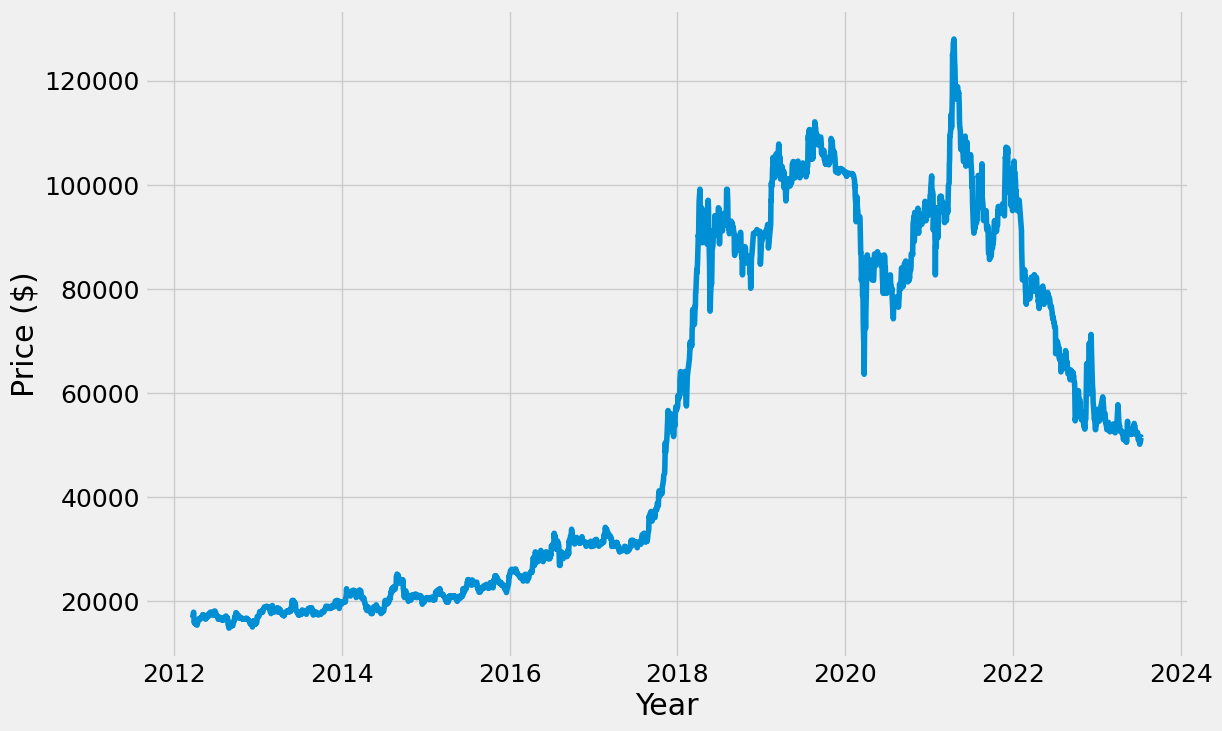

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.rcParams.update({'font.size': 14})

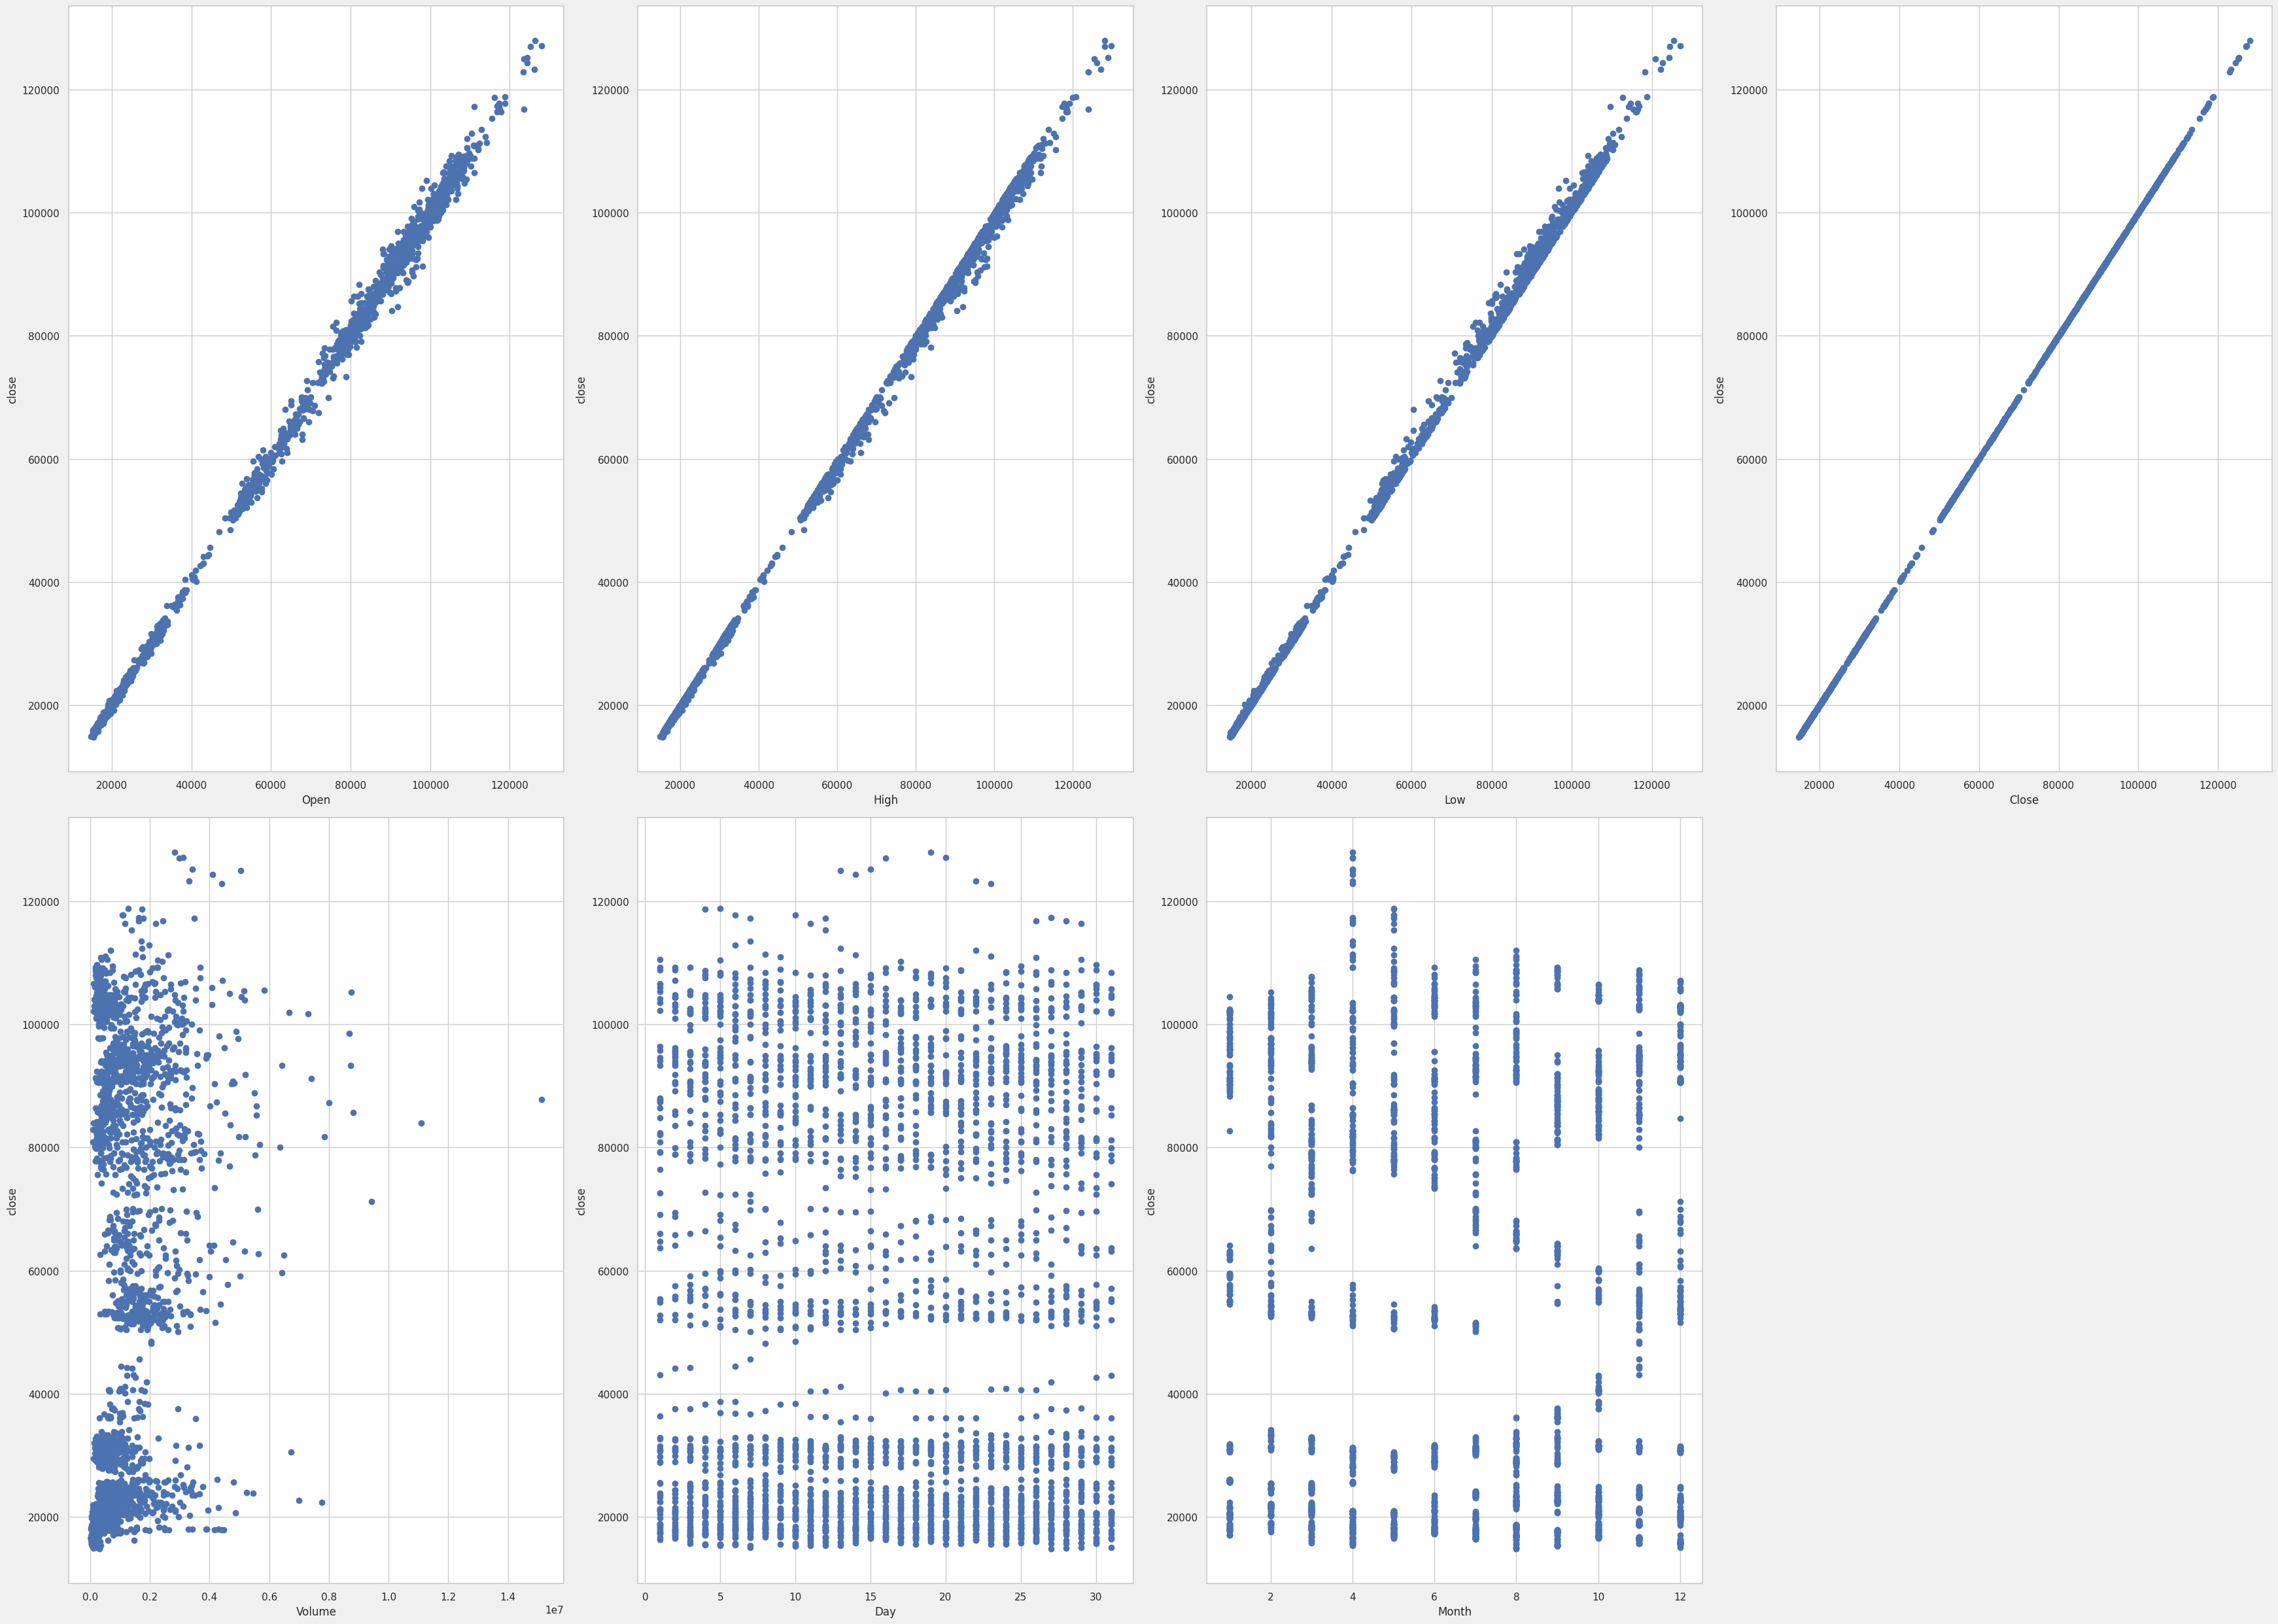

In [ ]:
fig = plt.figure(figsize=(35, 25))
sns.set(style='whitegrid')

num_cols = len(df.columns) - 1
num_rows = (num_cols + 3) // 4

for i, col in enumerate(df.columns[:-1]):
    fig.add_subplot(num_rows, 4, i + 1)
    plt.scatter(df[col], df['Close'])
    plt.xlabel(col)
    plt.ylabel('close')

plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2827 entries, 2012-03-20 to 2023-07-14
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    2827 non-null   int64
 1   High    2827 non-null   int64
 2   Low     2827 non-null   int64
 3   Close   2827 non-null   int64
 4   Volume  2827 non-null   int64
 5   Day     2827 non-null   int64
 6   Month   2827 non-null   int64
 7   Year    2827 non-null   int64
dtypes: int64(8)
memory usage: 198.8 KB


#4.MODEL TRAINING

##XÂY DỰNG MÔ HÌNH

In [ ]:
x_data = df.drop('Close', axis=1, inplace=False)
x_data

,Open,High,Low,Volume,Day,Month,Year
Time,,,,,,,
2012-03-20,16319,16985,16319,130940,20,3,2012
2012-03-21,16819,16819,16486,144040,21,3,2012
2012-03-22,16403,16819,16403,123360,22,3,2012
2012-03-23,16652,17152,16652,153050,23,3,2012
2012-03-26,17485,17818,16985,219500,26,3,2012
...,...,...,...,...,...,...,...
2023-07-10,50500,51200,50200,3345300,10,7,2023
2023-07-11,51000,51300,50800,1927900,11,7,2023
2023-07-12,51100,51900,50800,2295600,12,7,2023


In [ ]:
data=df.filter(['Close'])
y_data = data.copy()
y_data

,Close
Time,
2012-03-20,16652
2012-03-21,16652
2012-03-22,16652
2012-03-23,17152
2012-03-26,17818
...,...
2023-07-10,50900
2023-07-11,50800
2023-07-12,51400


In [ ]:
from sklearn.model_selection import train_test_split

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)



In [ ]:
y_data_test

,Close
Time,
2021-04-12,117320
2021-04-13,125052
2021-04-14,124430
2021-04-15,125230
2021-04-16,127096
...,...
2023-07-10,50900
2023-07-11,50800
2023-07-12,51400


In [ ]:
x_data_train.tail(3)

,Open,High,Low,Volume,Day,Month,Year
Time,,,,,,,
2021-04-07,112876,113764,111720,1698500,7,4,2021
2021-04-08,114120,114120,110209,1509200,8,4,2021
2021-04-09,110920,111454,109409,1755500,9,4,2021


In [ ]:
x_data_test.tail(3)

,Open,High,Low,Volume,Day,Month,Year
Time,,,,,,,
2023-07-12,51100,51900,50800,2295600,12,7,2023
2023-07-13,51500,52000,51200,1894000,13,7,2023
2023-07-14,51800,51800,51000,2013700,14,7,2023


In [ ]:
y_data_train.tail(3)

,Close
Time,
2021-04-07,113498
2021-04-08,111454
2021-04-09,111009


In [ ]:
y_data_test.tail(3)

,Close
Time,
2023-07-12,51400
2023-07-13,51500
2023-07-14,51400


###4.1 Xây dựng mô hình hồi quy tuyến tính

In [ ]:
reg = LinearRegression()
reg.fit(x_data_train,y_data_train)

LinearRegression()

In [ ]:
y_train_pre = reg.predict(x_data_train)
y_test_pre = reg.predict(x_data_test)

In [ ]:
y_data_train[:5]

,Close
Time,
2012-03-20,16652
2012-03-21,16652
2012-03-22,16652
2012-03-23,17152
2012-03-26,17818


In [ ]:
y_train_pre[:5]

array([[16871.73855374],
       [16607.67996491],
       [16741.71038433],
       [17060.14410515],
       [17454.39404857]])

In [ ]:
reg.coef_

array([[-4.36104480e-01,  8.54430370e-01,  5.80381618e-01,
        -5.55733541e-05, -3.66626846e-01, -9.43983426e-01,
         2.19506131e+00]])

In [ ]:
reg.intercept_

array([-4394.2419969])

####Đánh giá kết quả mô hình

In [ ]:
print('MAE in training set: ',mean_absolute_error(y_train_pre,y_data_train))
print('MAE in test set: ',mean_absolute_error(y_test_pre,y_data_test))

MAE in training set:  319.47343483315063
MAE in test set:  616.4121254322845


In [ ]:
from sklearn.metrics import r2_score
print('R2_score in training set: ',r2_score(y_train_pre,y_data_train))
print('R2_score in test set: ',r2_score(y_test_pre,y_data_test))

R2_score in training set:  0.9997638989007138
R2_score in test set:  0.9983504938585261


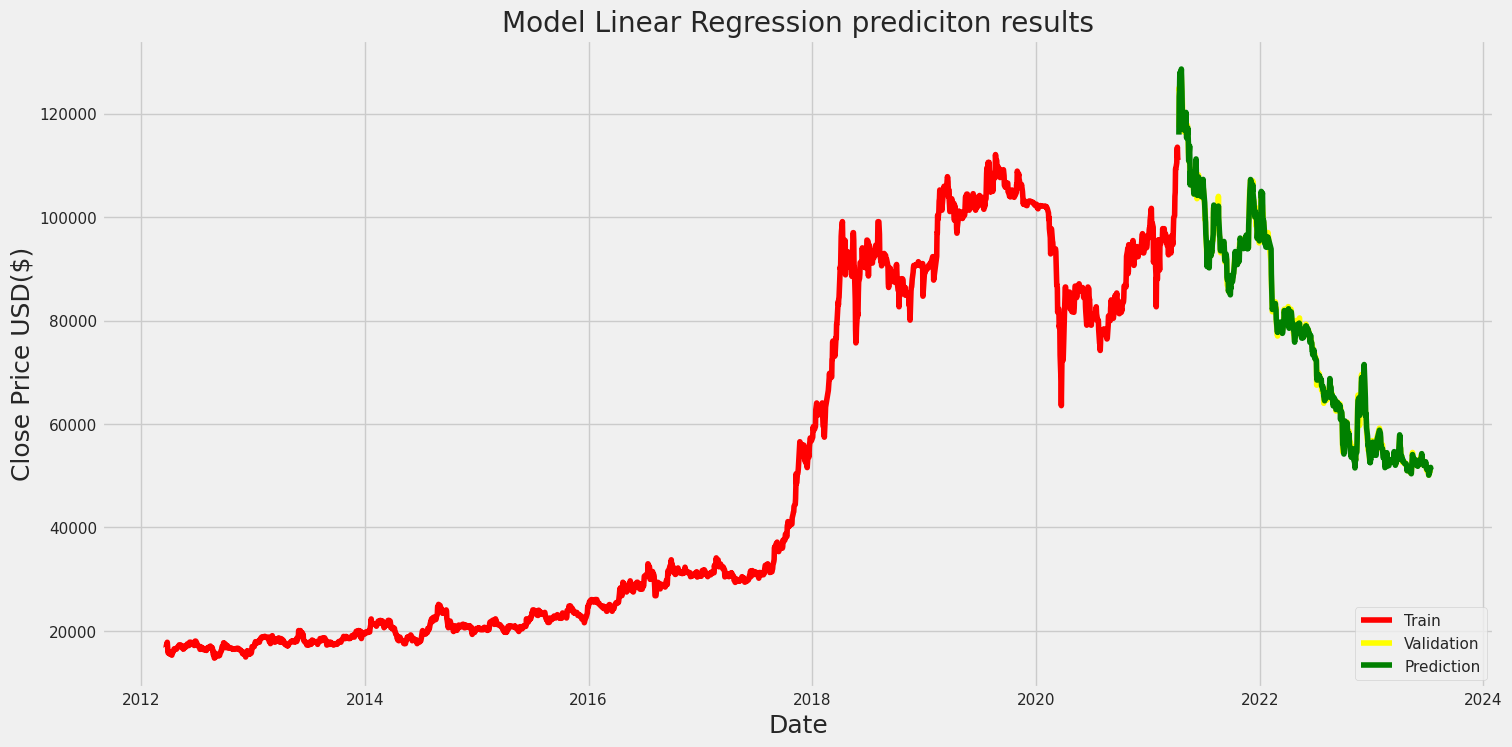

In [ ]:
#plot the data

train = y_data_train
test = y_data_test.copy()
test['Predictions'] = y_test_pre

#Visualize the data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Model Linear Regression prediciton results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(test['Close'] , color='yellow')
plt.plot(test['Predictions'] , color='green')
plt.legend(['Train','Validation', 'Prediction'], loc='lower right')
plt.savefig('/content/prediction1.png')
plt.show()

####Dự đoán giá cho ngày hôm sau

In [ ]:
last_day_features = x_data[-1:]

predicted_price = reg.predict(last_day_features)

print("Predicted price for the next day:", predicted_price)

Predicted price for the next day: [[51191.4619389]]


###4.2 Xây dựng mô hình rừng ngẫu nhiên

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
#regressor = RandomForestRegressor(n_estimators=20, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
# fit the regressor with x and y data
random_forest.fit(x_data_train, y_data_train)

<ipython-input-37-25d376b056c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_data_train, y_data_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pre_train_rd= random_forest.predict(x_data_train)
y_pre_test_rd = random_forest.predict(x_data_test)

####Đánh giá kết quả mô hình

In [ ]:
from sklearn.metrics import r2_score
print('R2_score in training set: ',r2_score(y_pre_train_rd,y_data_train))
print('R2_score in test set: ',r2_score(y_pre_test_rd,y_data_test))

R2_score in training set:  0.9999539673775647
R2_score in test set:  0.9873870477775423


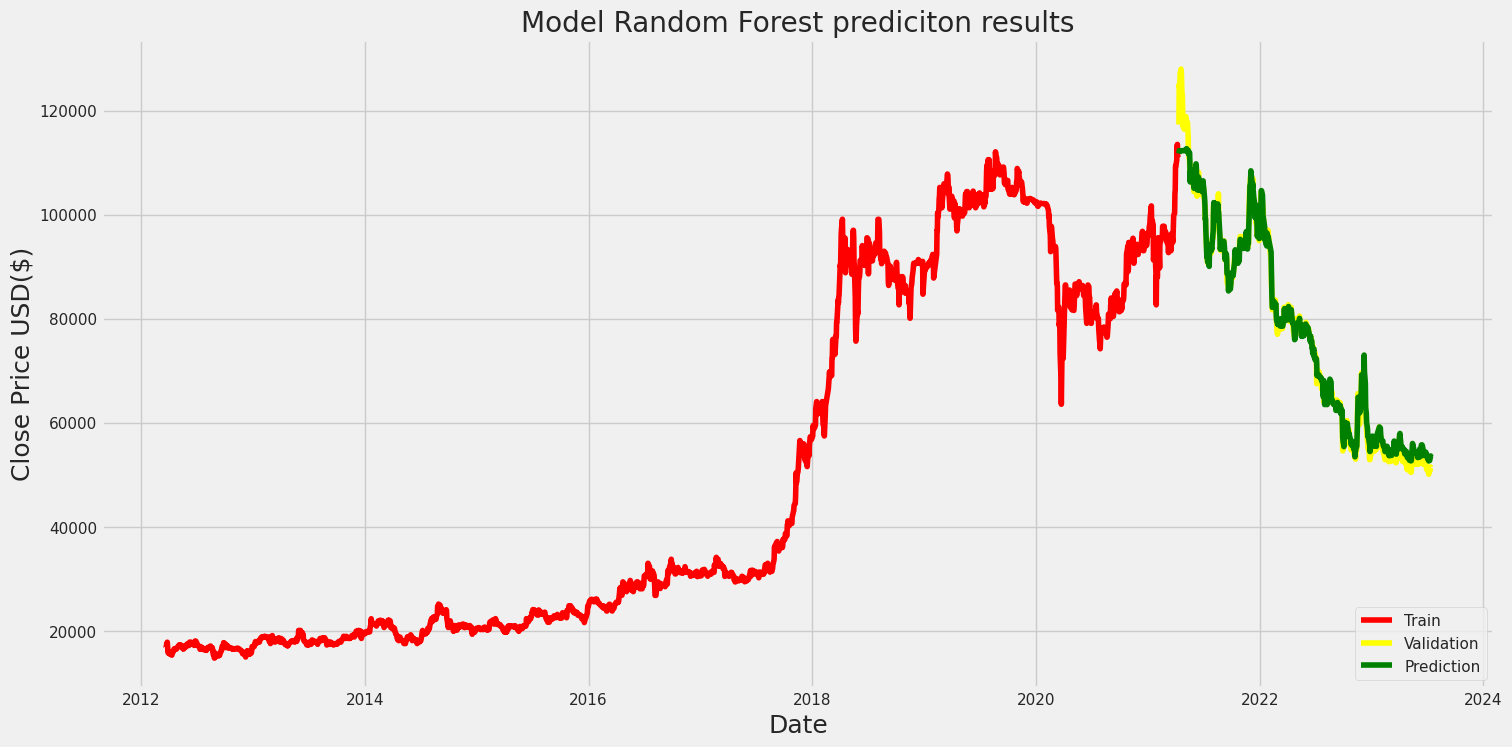

In [ ]:
train = y_data_train
test = y_data_test.copy()
test['Predictions'] = y_pre_test_rd

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Random Forest prediciton results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(test['Close'] , color='yellow')
plt.plot(test['Predictions'] , color='green')
plt.legend(['Train','Validation', 'Prediction'], loc='lower right')
plt.savefig('/content/prediction2.png')
plt.show()

####Dự đoán giá cho ngày hsau

In [ ]:
last_day_features = x_data[-1:]

predicted_price = random_forest.predict(last_day_features)

print("Predicted price for the next day:", predicted_price)

Predicted price for the next day: [53434.3]
